In [32]:
import numpy as np
import pandas as pd
import scipy
import imageio
import math
import phylo as ph
import os

from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.optimize import linprog
import scipy.spatial.distance as scidist

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
import warnings
sns.set(style="ticks")
plt.style.use("seaborn-whitegrid")

In [2]:
%load_ext blackcellmagic

# Preparation

All the expensive setup happens up here.

In [3]:
np.random.seed(820)
REGULAR_POKEMON = ph.vectorize_pokemon(ph.REGULAR_POKEMON_PATH)
SHINY_POKEMON = ph.vectorize_pokemon(ph.SHINY_POKEMON_PATH)

Vectorizing pokemon from /Users/vineshkannan/Documents/GitHub/phylo/images/regular/
Vector iteration 0
Vector iteration 100
Vector iteration 200
Vector iteration 300
Vector iteration 400
Vector iteration 500
Vector iteration 600
Done vectorizing
Vectorizing pokemon from /Users/vineshkannan/Documents/GitHub/phylo/images/shiny/
Vector iteration 0
Vector iteration 100
Vector iteration 200
Vector iteration 300
Vector iteration 400
Vector iteration 500
Vector iteration 600
Done vectorizing


# Similarity/Distance Metrics

How close is an image to another image?

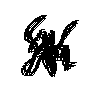

In [11]:
sketch = ph.load_img("../images/draw/absol_sketch.png")
sketch

In [21]:
skv = ph.vectorize(sketch)
skv

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [12]:
def binarize(xv):
    return np.array([ph.Q if v > 0 else 0 for v in xv])

In [13]:
binary_pokemon = [binarize(xv) for xv in REGULAR_POKEMON]

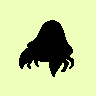

In [15]:
ph.showim(binary_pokemon[0])

In [22]:
scidist.hamming(skv, binary_pokemon[0])

0.1283637152777778

In [23]:
poke_df = pd.DataFrame()
poke_df["i"] = range(len(binary_pokemon))
poke_df["x"] = binary_pokemon
poke_df["hamming"] = [scidist.hamming(skv, xv) for xv in binary_pokemon]

In [42]:
top = poke_df.sort_values(by="hamming", ascending=True).head(5).reset_index(drop=True)
top

,i,x,hamming
0,443,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.084744
1,237,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.098633
2,539,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.101128
3,220,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.102648
4,393,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.105035


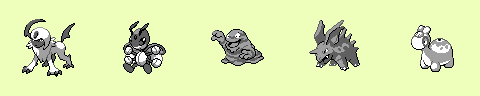

In [30]:
ph.imrow(REGULAR_POKEMON[top["i"]])

In [33]:
paths = []
for (dirnames, dirpath, filenames) in os.walk(ph.REGULAR_POKEMON_PATH):
    paths.extend(filenames)

In [43]:
paths[top["i"][0]]

'absol.png'